In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__
import os
import re

In [113]:
def extract_temperature(filename):
    match = re.search(r'(\d+)C', filename)
    if match:
        return int(match.group(1))
    else:
        return None

## heating and laser power series

In [114]:
# samoa one - This is on the linkam, changing temperature
df_IS_heat=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Heating_test_series\Isabelles_Data\Raman_session_June 3, 2025_fitted_2025-06-04_Samoa_HeatingTest.xlsx')
df_IS_heat['T (C)']=df_IS_heat['filename'].apply(extract_temperature)
# This is the samoa and next iceland ones. 
df_IS_power=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Heating_test_series\Isabelles_Data\Raman_session_June 4, 2025_fitted_2025-06-04.xlsx')

df_IS_power_c2=df_IS_power.loc[df_IS_power['filename'].str.contains('11I_c2')]
df_IS_heat_c2=df_IS_heat.loc[df_IS_heat['filename'].str.contains('11I_C2')]

df_IS=pd.concat([df_IS_heat,df_IS_power_c2])

# This is the one isabelle did on Charlottes Fogo melt and fluid inclusion samples in June
df_Fogo=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Heating_test_series\Isabelles_Data\Raman_session_June 25, 2025_fitted_2025-06-25_FOGO_MI_FI.xlsx', sheet_name='FI1_MI1')
df_Fogo_MI=df_Fogo.loc[df_Fogo['filename'].str.contains('MI')]
df_Fogo_FI=df_Fogo.loc[~(df_Fogo['filename'].str.contains('MI'))]
df_Fogo_MI_power=df_Fogo_MI.loc[df_Fogo_MI['filename'].str.contains('mW')]
df_Fogo_MI_heat=df_Fogo_MI.loc[~(df_Fogo_MI['filename'].str.contains('mW'))]
df_Fogo_MI_heat['T (C)']=df_Fogo_MI_heat['filename'].apply(extract_temperature)
df_Fogo_FI_power=df_Fogo_FI.loc[df_Fogo_FI['filename'].str.contains('mW')]
df_Fogo_FI_heat=df_Fogo_FI.loc[~(df_Fogo_FI['filename'].str.contains('mW'))]
df_Fogo_FI_heat['T (C)']=df_Fogo_FI_heat['filename'].apply(extract_temperature)

df_Fogo2=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Heating_test_series\Isabelles_Data\Raman_session_June 25, 2025_fitted_2025-06-25_FOGO_MI_FI.xlsx', sheet_name='FI2_MI2')
df_Fogo_MI2=df_Fogo2.loc[df_Fogo2['filename'].str.contains('MI')]
df_Fogo_FI2=df_Fogo2.loc[~(df_Fogo2['filename'].str.contains('MI'))]
df_Fogo_MI2_power=df_Fogo_MI2.loc[df_Fogo_MI2['filename'].str.contains('mW')]
df_Fogo_MI2_heat=df_Fogo_MI2.loc[~(df_Fogo_MI2['filename'].str.contains('mW'))]
df_Fogo_MI2_heat['T (C)']=df_Fogo_MI2_heat['filename'].apply(extract_temperature)
df_Fogo_FI2_power=df_Fogo_FI2.loc[df_Fogo_FI2['filename'].str.contains('mW')]
df_Fogo_FI2_heat=df_Fogo_FI2.loc[~(df_Fogo_FI2['filename'].str.contains('mW'))]
df_Fogo_FI2_heat['T (C)']=df_Fogo_FI2_heat['filename'].apply(extract_temperature)

#####################################################################################

df_D=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Heating_test_series\Charlotte_may2025\heating_power_series_101\Raman_session_June 3, 2025_fitted_2025-06-04.xlsx')
df_D['T (C)']=df_D['filename'].apply(extract_temperature)
df_D_FIB=df_D.loc[df_D['filename'].str.contains('101-B')]
df_D_FIC=df_D.loc[df_D['filename'].str.contains('101-C')]
# df_D_heat_FIB=df_D_FIB.loc[~(df_D_FIB['filename'].str.contains('mW'))]
# df_101C_heat=df_D_FIC.loc[~(df_D_FIC['filename'].str.contains('mW'))]

df_101B_power=df_D_FIB.loc[df_D_FIB['filename'].str.contains('mW')]
df_101C_power=df_D_FIC.loc[df_D_FIC['filename'].str.contains('mW')]

df_101B_heat=df_D_FIB.loc[~(df_D_FIB['filename'].str.contains('mW'))]
df_101C_heat=df_D_FIC.loc[~(df_D_FIC['filename'].str.contains('mW'))]

#####################################################################################
df_I=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Heating_test_series\Isabelles_Data\Raman_session_June 2, 2025_fitted_2025-06-03.xlsx')
df_I['T (C)']=df_I['filename'].apply(extract_temperature)

B30 = df_I['filename'].str.contains('B30_c1')
down = df_I['filename'].str.contains('down')
B23 = df_I['filename'].str.contains('B23_c3') & ~(df_I['filename'].str.contains('lid'))
B23_lid = df_I['filename'].str.contains('B23_c3') & df_I['filename'].str.contains('lid')
power_c1 = df_I['filename'].str.contains('B30_c1') & df_I['filename'].str.contains('mW')
power_c3 = df_I['filename'].str.contains('B23_c3') & df_I['filename'].str.contains('mW')
heat_c1 = df_I['filename'].str.contains('B30_c1') & ~(df_I['filename'].str.contains('mW'))
heat_c3 = df_I['filename'].str.contains('B23_c3') & ~(df_I['filename'].str.contains('mW'))


################################################

## Now lets do FG04-A13-1
# This is the laser power series. 
df_a13_power=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Heating_Laser_Fogo\MediumDensity\Raman_session_November 3, 2023_fitted_2023-11-03.xlsx')
df_a13_power=df_a13_power.loc[df_a13_power['Density g/cm3']>0.4]

# The heating series is here. 

df_a13_heat=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Heating_Series_a13\Raman_session_October 17, 2023_fitted_2023-10-18.xlsx')


df_a13_heat['T (C)'] = df_a13_heat['filename'].apply(extract_temperature)

df_a13_heat['filename'].iloc[0]

## My power series is here, c6_FIM, c6_FIN, c5_A1_FIP, C16_FIR
df_Samoa_Carb=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Samoa_carbonate_heating\Raman_session_July 18, 2025_fitted_2025-07-24.xlsx')
df_C6_FIM=df_Samoa_Carb.loc[df_Samoa_Carb['filename'].str.contains('c6_FIM')]


df_C6_FIN=df_Samoa_Carb.loc[df_Samoa_Carb['filename'].str.contains('c6_FIN')]
df_C5_A1_FIP=df_Samoa_Carb.loc[df_Samoa_Carb['filename'].str.contains('c5_A1_FIP') &df_Samoa_Carb['filename'].str.contains('away_from_Carb') ] 
df_C16_FIR=df_Samoa_Carb.loc[df_Samoa_Carb['filename'].str.contains('C16_FIR')]

df_C6_FIM['Series_Name']='df_C6_FIM_power'
df_C6_FIN['Series_Name']='df_C6_FIN_power'
df_C5_A1_FIP['Series_Name']='df_C5_A1_FIP_power'
df_C16_FIR['Series_Name']='df_C16_FIR_power'

df_C6_FIM['Fo']=0.865296049
df_C6_FIN['Fo']=0.865296049

df_C5_A1_FIP['Fo']=0.863398795
df_C16_FIR['Fo']=0.863503953


C:\Users\penny\AppData\Local\Temp\ipykernel_30032\899811095.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fogo_MI_heat['T (C)']=df_Fogo_MI_heat['filename'].apply(extract_temperature)
C:\Users\penny\AppData\Local\Temp\ipykernel_30032\899811095.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fogo_FI_heat['T (C)']=df_Fogo_FI_heat['filename'].apply(extract_temperature)
C:\Users\penny\AppData\Local\Temp\ipykernel_30032\899811095.py:28: SettingWithCopyWarning: 
A value is trying to be set on a c

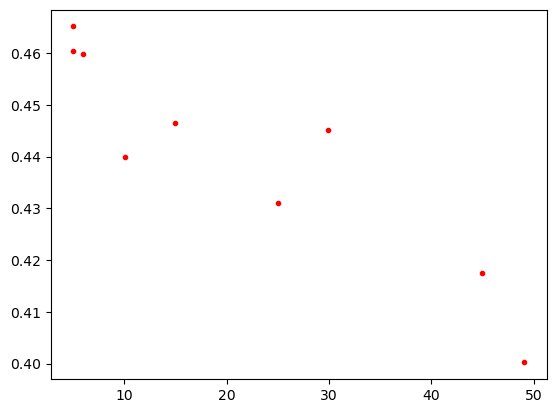

In [115]:
plt.plot(df_C16_FIR['power (mW)'], df_C16_FIR['Density g/cm3'], '.r')

In [116]:
df_Samoa_Carb['filename'].unique()

array(['DD11K_c6_FIM_5mW', 'DD11K_c6_FIM_15mW', 'DD11K_c6_FIM_30mW',
       'DD11K_c6_FIM_45mW', 'DD11K_c6_FIM_25mW_down',
       'DD11K_c6_FIM_10mW_down', 'DD11K_c6_FIM_5mW_down',
       'DD11K_c6_FIM_49mW_down', 'DD11K_c6_FIN_5mW', 'DD11K_c6_FIN_15mW',
       'DD11K_c6_FIN_30mW', 'DD11K_c6_FIN_45mW',
       'DD11K_c6_FIN_25mW_down_', 'DD11K_c6_FIN_10mW_down_',
       'DD11K_c6_FIN_5mW_down_', 'DD11K_c6_FIN_49mW_down_',
       'DD1K_c5_A1_FIP_5mW', 'DD1K_c5_A1_FIP_15mW_cutearly_as_weak',
       'DD1K_c5_A1_FIP_15mW', 'DD1K_c5_A1_FIP_30mW_away_from_Carb',
       'DD1K_c5_A1_FIP_45mW_away_from_Carb',
       'DD1K_c5_A1_FIP_25mW_down_away_from_Carb',
       'DD1K_c5_A1_FIP_10mW_down_away_from_Carb',
       'DD1K_c5_A1_FIP_5mW_down_away_from_Carb',
       'DD1K_c5_A1_FIP_15mW_away_from_Carb',
       'DD1K_c5_A1_FIP_5mW_away_from_Carb',
       'DD1K_c5_A1_FIP_49mW_away_from_Carb', 'DD11K_C16_FIH',
       'DD11K_C16_FIJ', 'DD11K_C16_FIL', 'DD11K_C16_FIM_50X',
       'DD11K_C16_FIO', 'DD11K_

## Making one dataframe for all the power series

In [117]:
B23_c3_power=df_I.loc[power_c3]
B30_c1_power=df_I.loc[power_c1]

dfs = [
    B30_c1_power.copy(),
    B23_c3_power.copy(),
    df_IS_power_c2.copy(),
    df_a13_power.copy(),
    df_101B_power.copy(),
    df_101C_power.copy(),
    df_Fogo_FI_power.copy(),
    df_Fogo_MI_power.copy(),
    df_Fogo_FI2_power.copy(),
    df_Fogo_MI2_power.copy(),


]

labels_power = [
    'B30_c1_power',
    'B23_c3_power',
    '11i_c2_power',
    'FG04-13-1_power',
    '101B_power',
    '101C_power',
    'FG04-A3_FI1_power',
    'FG04-A3_MI1_power',
    'FG04-A3_FI2_power',
    'FG04-A3_MI2_power',
    'FG04-A3_MI2_power',

    
]

# Add Series_Name column and concatenate
for df, label in zip(dfs, labels_power):
    df['Series_Name'] = label
    


# Combine all into one big DataFrame
merged_power_df = pd.concat(dfs, ignore_index=True)
merged_power_df.insert(0, 'Series_Type', 'power')



## Making one dataframe for all the heating series

In [118]:
B23_c3_heat=df_I.loc[heat_c3]
B30_c1_heat=df_I.loc[heat_c1]

dfs = [
    B30_c1_heat.copy(),
    B23_c3_heat.copy(),
    df_IS_heat_c2.copy(),
    df_a13_heat.copy(),
    df_101B_heat.copy(),
    df_101C_heat.copy(),
    df_Fogo_FI_heat.copy(),
    df_Fogo_MI_heat.copy(),
    df_Fogo_FI2_heat.copy(),
    df_Fogo_MI2_heat.copy(),
]

labels_heat = [
    'B30_c1_heat',
    'B23_c3_heat',
    '11i_c2_heat',
    'FG04-13-1_heat',
    '101B_heat',
    '101C_heat',
    'FG04-A3_FI1_heat',
    'FG04-A3_MI1_heat',
    'FG04-A3_FI2_heat',
    'FG04-A3_MI2_heat',
    
]

# Add Series_Name column and concatenate
for df, label in zip(dfs, labels_heat):
    df['Series_Name'] = label


# Combine all into one big DataFrame
merged_heat_df = pd.concat(dfs, ignore_index=True)
merged_heat_df.insert(0, 'Series_Type', 'heat')

In [119]:
merged_heat_df.to_clipboard(excel=True)

In [120]:
len(merged_power_df)

143

## Lets make a sheet for all the other power series that we have

In [121]:
## ALEX
df_March21=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Alex_runs\PowerSeriesML77_Raman_session_March-21-2024_fitted_2024-04-01.xlsx')
df_March21['Series_Name']='ML22_77_power'
df_March21['Type']='Mauna Loa MI'

## Alex
df_March21_2=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Alex_runs\PowerSeriesMP2_204_Raman_session_March-21-2024_fitted_2024-04-01.xlsx')
df_March21_2['Series_Name']='MP2_204_power'
df_March21_2['Type']='Mauna Loa MI'
# Alex
df_March27=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Alex_runs\Raman_session_March-27-2024_fitted_2024-04-01.xlsx')
df_March27['Series_Name']='ML22_77_4_MIA_power'
df_March27['Type']='Mauna Loa MI'
# Charlottes ones
df_CF=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\powerseries\Raman_session_November 7, 2023_fitted_2023-11-08.xlsx')
df_CF_9=df_CF.loc[df_CF['filename'].str.contains('FG04-A11-9')].copy()
df_CF_9['Type']='Fogo FI'
df_CF_9['Series_Name']='FG04-A11-9_power'
df_CF_16=df_CF.loc[df_CF['filename'].str.contains('FG04-A11-16')].copy()
df_CF_16['Series_Name']='FG04-A11-16_power'
df_CF_16['Type']='Fogo FI'

df_CF_4=df_CF.loc[(df_CF['filename'].str.contains('FG04-A11-4'))&~(df_CF['filename'].str.contains('FG04-A11-4-4mW-5')) &~(df_CF['filename'].str.contains('FG04-A11-4-16mW-2')) ].copy()
df_CF_4['Series_Name']='FG04-A11-4_power'
df_CF_4['Type']='Fogo FI'

# More charlotte
df_101_Nov6=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Heating_Laser_Fogo\HigherDensity\Raman_session_November 6, 2023_fitted_2023-11-06.xlsx')
df_101_Nov6['Series_Name']='FG19_101_FIB_power'
df_101_Nov6['Type']='Fogo FI'

##
df_Fo1=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Heating_Laser_Fogo\Fo1_laserpower\Raman_session_November 6, 2023_fitted_2023-11-08.xlsx')
df_Fo1['Series_Name']='Fo1_power'
df_Fo1['Type']='Cascade MI'

##
df_A13=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Heating_Laser_Fogo\MediumDensity\Raman_session_November 3, 2023_fitted_2023-11-03.xlsx')
df_A13['Series_Name']='FG04_A13_12_power'
df_A13['Type']='Fogo FI'

## PYroxene series
df_MP=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\P3_pyroxene_heating\Raman_session_February 6, 2024_fitted_2024-02-06.xlsx')
df_MP=df_MP.loc[df_MP['filename'].str.contains('p3_FI4')]
df_MP['Series_Name']='p3_FI4'
df_MP['Type']='Galapagos FI'

## Icelandic ones
df_Ap24=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Laser_heating_Iceland_April2025\PennyTests\Raman_session_April 24, 2025_fitted_2025-05-19.xlsx')

df_B22_1=df_Ap24.loc[df_Ap24['filename'].str.contains('B22_1_FIA')].copy()
df_B22_1['Type']='Icelandic FI'
df_B22_1['Series_Name']='B22_1'
df_B22_1['Fo']=0.739881757

df_B31_c8=df_Ap24.loc[df_Ap24['filename'].str.contains('B31_c8')].copy()
df_B31_c8['Type']='Icelandic FI'
df_B31_c8['Series_Name']='B31_c8'
df_B31_c8['Fo']=0.841028844

df_B27_c4=df_Ap24.loc[df_Ap24['filename'].str.contains('B27_c4')].copy()
df_B27_c4['Type']='Icelandic FI'
df_B27_c4['Series_Name']='B27_c4'
df_B27_c4['Fo']=0.843988556

df_B27_c19=df_Ap24.loc[df_Ap24['filename'].str.contains('B27_c19')].copy()
df_B27_c19['Type']='Icelandic FI'
df_B27_c19['Series_Name']='B27_c19'
df_B27_c19['Fo']=0.75477171

## Isabelles ones
df_May23=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Laser_heating_Iceland_April2025\Isabelle_Tests\heatingtest1\Raman_session_May 23, 2025_fitted_2025-05-26.xlsx')

df_B31_c11=df_May23.loc[df_May23['filename'].str.contains('B31_c11')].copy()
df_B31_c11['Type']='Icelandic FI'
df_B31_c11['Series_Name']='B31_c11'
df_B31_c11['Fo']=0.760986133

df_B31_c7=df_May23.loc[df_May23['filename'].str.contains('B31_c7')].copy()
df_B31_c7['Type']='Icelandic FI'
df_B31_c7['Series_Name']='B31_c7'
df_B31_c7['Fo']=0.776073432

## More isabelle ones

df_May27=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Laser_heating_Iceland_April2025\Isabelle_Tests\heatingtest2\Raman_session_May 27, 2025_fitted_2025-05-28.xlsx')

df_B23_1_A=df_May27.loc[df_May27['filename'].str.contains('B23_1_FIA')].copy()
df_B23_1_A['Type']='Icelandic FI'
df_B23_1_A['Series_Name']='B23_1_A'
df_B23_1_A['Fo']=0.820743717

df_B23_1_C=df_May27.loc[df_May27['filename'].str.contains('B23_1_FIC')].copy()
df_B23_1_C['Type']='Icelandic FI'
df_B23_1_C['Series_Name']='B23_1_C'
df_B23_1_C['Fo']=0.820743717

df_B31_c6=df_May27.loc[df_May27['filename'].str.contains('B31_c6')].copy()
df_B31_c6['Type']='Icelandic FI'
df_B31_c6['Series_Name']='B31_c6'
df_B31_c6['Fo']=0.750965078

## More isabelle ones

df_June25=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Heating_test_series\Isabelles_Data\Raman_session_June 4, 2025_fitted_2025-06-04.xlsx')

df_B26_c11_FIX=df_June25.loc[df_June25['filename'].str.contains('B26_c11_FIX')].copy()
df_B26_c11_FIX['Type']='Icelandic FI'
df_B26_c11_FIX['Series_Name']='B31_c6_FIX'
df_B26_c11_FIX['Fo']=0.779070861

df_B26_c11_FIZ=df_June25.loc[df_June25['filename'].str.contains('B26_c11_FIZ')].copy()
df_B26_c11_FIZ['Type']='Icelandic FI'
df_B26_c11_FIZ['Series_Name']='B31_c6_FIZ'
df_B26_c11_FIZ['Fo']=0.779070861
# More isabelle 
df_10June=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Laser_power_Series\Laser_heating_Iceland_April2025\Isabelle_Tests\Raman_session_June 10, 2025_fitted_2025-06-10_all.xlsx')

df_B23_1_FIC=df_10June.loc[df_10June['filename'].str.contains('B23_1_FIC')].copy()
df_B23_1_FIC['Type']='Icelandic FI'
df_B23_1_FIC['Series_Name']='B23_1_FIC'
df_B23_1_FIC['Fo']=0.820743717


df_B26_c8_a3_FIZ=df_10June.loc[df_10June['filename'].str.contains('B26_c8_a3_FIZ')].copy()
df_B26_c8_a3_FIZ['Type']='Icelandic FI'
df_B26_c8_a3_FIZ['Series_Name']='B26_c8_a3_FIZ'
df_B26_c8_a3_FIZ['Fo']=0.752845605



df_B26_c8_a3_FIX=df_10June.loc[df_10June['filename'].str.contains('B26_c8_a3_FIX')].copy()
df_B26_c8_a3_FIX['Type']='Icelandic FI'
df_B26_c8_a3_FIX['Series_Name']='B26_c8_a3_FIX'
df_B26_c8_a3_FIX['Fo']=0.752845605

df_B27_17=df_10June.loc[df_10June['filename'].str.contains('B27_17')].copy()
df_B27_17['Type']='Icelandic FI'
df_B27_17['Series_Name']='B27_17'
df_B27_17['Fo']=0.818043881


df_B31_c4=df_10June.loc[df_10June['filename'].str.contains('B31_c4')].copy()
df_B31_c4['Type']='Icelandic FI'
df_B31_c4['Series_Name']='B31_c4'
df_B31_c4['Fo']=0.796430578505229


In [122]:
dfs = [
    df_March21, df_March21_2, df_March27, df_CF_9, df_CF_16, df_CF_4,
    df_101_Nov6, df_Fo1, df_A13, df_MP, df_B22_1, df_B31_c8,
    df_B27_c4, df_B27_c19, df_B31_c11, df_B31_c7, df_B23_1_A,
    df_B23_1_FIC, df_B31_c6, df_B26_c11_FIX, df_B26_c11_FIZ,
    df_B27_17, df_B26_c8_a3_FIZ, df_B26_c8_a3_FIX, df_B31_c4,   df_C6_FIM,   df_C6_FIN,   df_C5_A1_FIP, df_C16_FIR

    
]


# Remove duplicates based on object identity (memory location)
dfs_unique = []
seen_ids = set()

for df in dfs:
    df_id = id(df)
    if df_id not in seen_ids:
        dfs_unique.append(df)
        seen_ids.add(df_id)

# Now combine
combined_df2 = pd.concat(dfs_unique, ignore_index=True)


## Polishing series 

In [123]:
# My polishing series shown in the main text
df_polish_PW=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Sectioning_tests\PennyFlipSeries\Raman_session_July 16, 2025_fitted_2025-07-16.xlsx')
df_polish_PW['Depth'] = df_polish_PW['filename'].str.extract(r'_(\d+)um')[0].astype(int)*1.7

In [124]:
df1=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Sectioning_tests\Charlottes_Flip_Series\Series_06242025\Raman_session_June 24, 2025_fitted_2025-06-30.xlsx')
df2=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Sectioning_tests\Charlottes_Flip_Series\DayBefore\Raman_session_June 23, 2025_fitted_2025-06-30.xlsx')
df_polish_CD=pd.concat([df1, df2], ignore_index=True)
df_polish_CD['Depth'] = df_polish_CD['filename'].str.extract(r'([0-9.]+)um')[0].astype(float)*1.7

In [125]:
## Now lets merge these
pd_concat_polish=pd.concat([df_polish_CD, df_polish_PW], axis=0)

## Loading in the Ne polynomial data

In [126]:
read_combined = pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Example1c_Bakker_Ne_Method\combined_Neon_data.xlsx', sheet_name=None)
NeonPoly_df2 = read_combined['Neon_Fits']
NeonPoly_ideal = read_combined['Ideal_Splits']

## Load in the data to show the change in Ne lines

In [127]:
df_combo_sec_phase=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Charlottes_Tm_data_diffNeLines\Cali_data_devitre.xlsx')
df_Tm=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Charlottes_Tm_data_diffNeLines\Microtherm_May30.xlsx')

## Data for changing spectral center

In [128]:
df_spectral_center=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Spectral center sensitivity\changing_spectral_center.xlsx')

## Read in different non linearities

In [129]:
combined_peaks=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Examples_of_non_linearity\combined_correction_data.xlsx', 
                             sheet_name='corr_peaks_all')
combined_factors=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Examples_of_non_linearity\combined_correction_data.xlsx', 
                             sheet_name='corr_factors_all')

## Standard analyses

In [130]:
df_standards= pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Standard_Tracking\FI standard tracking.xlsx', sheet_name='All')

## Microthermometry analysis of standards

In [131]:
df_Tm=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\FI_Standards\Micotherm_March2025\Microthermo_results_March2025.xlsx', sheet_name='Corr_results')

## Temperature test day

In [132]:

df_Raman_all=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Temp_Tests_Apr2025\RoomT_Test_Charlotte_TagTeam\Raman_session_May 30, 2025_fitted_2025-06-02.xlsx')
df_Temp=df_Raman_all.loc[~(df_Raman_all['filename'].str.contains('drift'))]

## Bakker shifting data

In [133]:
df_bakker=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Improving Precision\Bakker_2021_data\Spectra_CO2_LabRamHR_600\Bakker_026_spectral_res.xlsx')

## Loading in different peak fits

In [134]:
df_fits=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Different_PDF_Functions\combined_fit_data.xlsx')

## Published Microthermometry Data from DeVitre and Wieser (2023)

In [135]:
df_Fogo_DW23=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Charlottes_Tm_data_diffNeLines\DeVitre_TM_Comparison.xlsx')
df_Kil_DW23=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Charlottes_Tm_data_diffNeLines\DeVitre_TM_Comparison.xlsx', sheet_name='Kil')


In [136]:
import pandas as pd

# Combine the two DataFrames
combined_df = pd.concat([merged_power_df, merged_heat_df], ignore_index=True)

# Set the Excel file name
excel_file = r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx'



# Write to the first sheet
with pd.ExcelWriter(excel_file, engine='openpyxl', mode='w') as writer:
    combined_df.to_excel(writer, sheet_name='Combined_power_heating_series', index=False)
    combined_df2.to_excel(writer, sheet_name='power_series', index=False)
    pd_concat_polish.to_excel(writer, sheet_name='polish_series', index=False)
    NeonPoly_df2.to_excel(writer, sheet_name='Polynomial_Neons', index=False)
    NeonPoly_ideal.to_excel(writer, sheet_name='Ideal_Ne_corr_factors', index=False)
    df_combo_sec_phase.to_excel(writer, sheet_name='Fogo_FI_data', index=False)
    df_Tm.to_excel(writer, sheet_name='Fogo_FI_Microtherm_data', index=False)
    df_spectral_center.to_excel(writer, sheet_name='Changing_spectral_center', index=False)
    combined_peaks.to_excel(writer, sheet_name='Ne_peak_positions_diffLabs', index=False)
    combined_factors.to_excel(writer, sheet_name='Ne_corr_factor_diffLabs', index=False)
    df_standards.to_excel(writer, sheet_name='Standard_repeatability', index=False)
    df_Tm.to_excel(writer, sheet_name='Standards_microthermometry', index=False)
    df_Temp.to_excel(writer, sheet_name='Room_temp_drift', index=False)
    df_bakker.to_excel(writer, sheet_name='Bakker_drift_with_spectrometer', index=False)
    df_fits.to_excel(writer, sheet_name='Different_Peak_Fits', index=False)
    df_Fogo_DW23.to_excel(writer, sheet_name='Fogo_Tm_Raman_DW2023', index=False)
    df_Kil_DW23.to_excel(writer, sheet_name='Kil_Raman_DW2023', index=False)


    
